In [1]:
from random import expovariate # Generate variates from exponential distribution
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def gillespie_ABA(N,B0,beta,gamma,Tmax):

    A=[N-B0] # We cannot predict how many elements there will be unfortunately
    B=[B0]
    T=[0] 
    state = np.random.permutation([0]*(N-B0)+[1]*B0) # Randomly allocate B0 individuals to have state B (state=1), A (state=0) otherwise 
    B_contacts = np.where(state==1)[0] # Index of individuals in state B (state=1).
    rate_vector = B0*beta*np.ones((N,1))/N # Set rates to be B0*beta/N (rate for individuals in state A) to all individuals (initialisation). 
    rate_vector[B_contacts] = gamma # Update rate of B_contacts to be gamma (the rate for individuals in state B)
    
    time = 0
    while time<=Tmax+0.5: # some (arbitrary) buffer after Tmax
        rate = np.sum(rate_vector) # Total rate (refer to Gillespie algorithm for details)
        cumrate = np.cumsum(rate_vector) # Cumulated sum of rates
        if rate > 0.000001: # if rate is sufficiently large
            tstep = expovariate(rate) # Pick an exponentially distributed time. Beware of difference with exprnd in Matlab where it is 1/rate
            T.append(T[-1]+tstep) # Time of next event
            event = np.where(cumrate>np.random.rand()*rate)[0][0] # Find which individual will see its state change 
            if state[event]==0: # individual is in state A 
                A.append(A[-1]-1) # this state A individual becomes state B so number of state A individuals is decreased
                B.append(B[-1]+1) # obviously, number of state B individuals is increased 
                state[event] = 1 # Update state vector
                rate_vector[event] = gamma # Change rate of individual to B->A rate, namely gamma
                A_contacts = np.where(state==0)[0] # List of state A individuals after change
                rate_vector[A_contacts] += beta/N # Update rate of state A individuals to account for the extra state B individual
            else: # individual is in state B
                B.append(B[-1]-1) # this state B individual becomes state A so number of state B individuals is decreased
                A.append(A[-1]+1) # obviously, number of state A individuals is increased
                state[event] = 0 # Update state vector
                A_contacts = np.where(state==0)[0] # List of state A individuals after changes                                
                rate_vector[A_contacts] = beta*len(np.where(state==1)[0])/N # Update rate of state A individuals based on number of B individuals  
        else: # Nothing will happen from now on so we can accelerate the process
            time = T[-1] # current time
            while time <= Tmax + 0.5:
                A.append(A[-1]) # Just keep things as they are
                B.append(B[-1])
                T.append(T[-1]+0.5) # arbitrarily add 0.5 to clock
                time = T[-1]
        # Update time and proceed with loop 
        time = T[-1]         

    return T,A,B

In [5]:
avgT = []
avgA = []
avgB = []
sNT,sNA,sNB= gillespie_ABA(100,15, 5, 2, 100)
lNT,lNA,lNB= gillespie_ABA(1000,1, 5, 2, 100)
sBT,sBA,sBB= gillespie_ABA(100,2, 5, 2, 100)
lBT,lBA,lBB= gillespie_ABA(100,75, 5, 2, 100)
sRT,sRA,sRB= gillespie_ABA(100,15, 1, 100, 100)
lRT,lRA,lRB= gillespie_ABA(100,15, 100, 1, 100)
ORT,ORA,ORB= gillespie_ABA(100,15, 5, 5, 100)

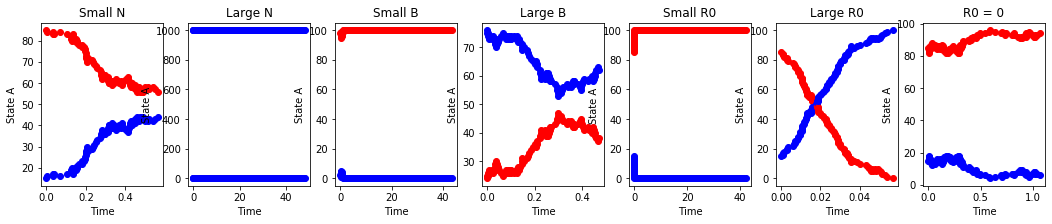

<Figure size 432x288 with 0 Axes>

In [6]:
fig, axes = plt.subplots(1, 7, figsize=(18,3))
plt.figure()
#print(sNT,sNA)
for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[0].plot(sNT[i], sNA[i], 'ro' )
    axes[0].plot(sNT[i], sNB[i], 'bo')
    axes[0].set_title("Small N")
    axes[0].set(xlabel= 'Time', ylabel='State A')
for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[1].plot(lNT[i], lNA[i], 'bo')
    axes[1].plot(lNT[i], lNB[i], 'bo')
    axes[1].set_title("Large N")
    axes[1].set(xlabel= 'Time', ylabel='State A')
#plt.subplot(4,2,1)

for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[2].plot(sBT[i], sBA[i], 'ro')
    axes[2].plot(sBT[i], sBB[i], 'bo')
    axes[2].set_title("Small B")
    axes[2].set(xlabel= 'Time', ylabel='State A')

for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[3].plot(lBT[i], lBA[i], 'ro')
    axes[3].plot(lBT[i], lBB[i], 'bo')
    axes[3].set_title("Large B")
    axes[3].set(xlabel= 'Time', ylabel='State A')

for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[4].plot(sRT[i], sRA[i], 'ro')
    axes[4].plot(sRT[i], sRB[i], 'bo')
    axes[4].set_title("Small R0")
    axes[4].set(xlabel= 'Time', ylabel='State A ')

for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[5].plot(lRT[i], lRA[i], 'ro')
    axes[5].plot(lRT[i], lRB[i], 'bo')
    axes[5].set_title("Large R0")
    axes[5].set(xlabel= 'Time', ylabel='State A')   
for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[6].plot(ORT[i], ORA[i], 'ro')
    axes[6].plot(ORT[i], ORB[i], 'bo')
    axes[6].set_title("R0 = 0")
    axes[6].set(xlabel= 'Time', ylabel='State A')    
    


No handles with labels found to put in legend.


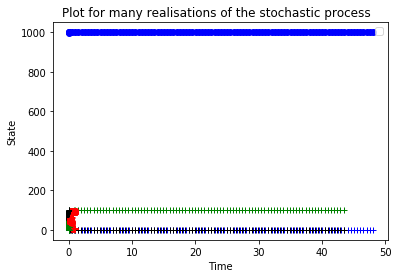

In [7]:
for i in range(0,100):
    
   
    plt.plot(lNT[i], lNB[i], 'b+')
    plt.plot(lNT[i], lNA[i], 'bo')
    plt.plot(sBT[i], sBA[i], 'g+')
    plt.plot(sBT[i], sBB[i], 'k+')
    plt.plot(lBT[i], lBA[i], 'ro')

    plt.plot(lBT[i], lBB[i], 'r+')
    #plt.plot(sRT[i], sRA[i], 'bo')
    #plt.plot(sRT[i], sRB[i], 'bo')
    plt.plot(lRT[i], lRA[i], 'g+')
    plt.plot(lRT[i], lRB[i], 'k+')
    plt.plot(ORT[i], ORA[i], 'ro')
    plt.plot(ORT[i], ORB[i], 'r+')

plt.title('Plot for many realisations of the stochastic process  ')
plt.ylabel('State')
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()    
    

In [9]:
avg = []
for i in range(0,100):
    avgT.append((sNT[i]+lNT[i]+lBT[i]+sBT[i]+sRT[i]+lRT[i]+ORT[i])/7) 
    avgA.append((sNA[i]+lNA[i]+lBA[i]+sBA[i]+sRA[i]+lRA[i]+ORA[i])/7)  
    avgB.append((sNB[i]+lNB[i]+lBB[i]+sBB[i]+sRB[i]+lRB[i]+ORT[i])/7)  
for i in range(0,100):
    avg.append((avgA[i]+avgB[i])/2) 

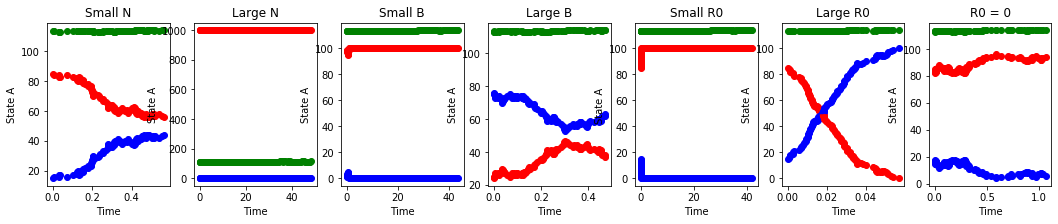

<Figure size 432x288 with 0 Axes>

In [11]:
fig, axes = plt.subplots(1, 7, figsize=(18,3))
plt.figure()
#print(sNT,sNA)
for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[0].plot(sNT[i], sNA[i], 'ro' )
    axes[0].plot(sNT[i], sNB[i], 'bo')
    axes[0].plot(sNT[i],avg[i], 'go')
    axes[0].set_title("Small N")
    axes[0].set(xlabel= 'Time', ylabel='State A')
for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[1].plot(lNT[i], lNA[i], 'ro')
    axes[1].plot(lNT[i], lNB[i], 'bo')
    axes[1].plot(lNT[i],avg[i], 'go')
    axes[1].set_title("Large N")
    axes[1].set(xlabel= 'Time', ylabel='State A')
#plt.subplot(4,2,1)

for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[2].plot(sBT[i], sBA[i], 'ro')
    axes[2].plot(sBT[i], sBB[i], 'bo')
    axes[2].plot(sBT[i],avg[i], 'go')
    axes[2].set_title("Small B")
    axes[2].set(xlabel= 'Time', ylabel='State A')

for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[3].plot(lBT[i], lBA[i], 'ro')
    axes[3].plot(lBT[i], lBB[i], 'bo')
    axes[3].plot(lBT[i],avg[i], 'go')
    axes[3].set_title("Large B")
    axes[3].set(xlabel= 'Time', ylabel='State A')

for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[4].plot(sRT[i], sRA[i], 'ro')
    axes[4].plot(sRT[i], sRB[i], 'bo')
    axes[4].plot(sRT[i],avg[i], 'go')
    axes[4].set_title("Small R0")
    axes[4].set(xlabel= 'Time', ylabel='State A ')    
for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[5].plot(lRT[i], lRA[i], 'ro')
    axes[5].plot(lRT[i], lRB[i], 'bo')
    axes[5].plot(lRT[i],avg[i], 'go')
    axes[5].set_title("Large R0")
    axes[5].set(xlabel= 'Time', ylabel='State A')    

for i in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[6].plot(ORT[i], ORA[i], 'ro')
    axes[6].plot(ORT[i], ORB[i], 'bo')
    axes[6].plot(ORT[i],avg[i], 'go')
    axes[6].set_title("R0 = 0")
    axes[6].set(xlabel= 'Time', ylabel='State A')    
    

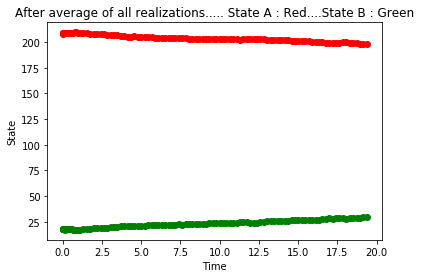

In [12]:
for i in range(0, 100):
	plt.plot(avgT[i], avgA[i],'ro')
	plt.plot(avgT[i],avgB[i], 'go')
plt.ylabel("State")
plt.xlabel("Time")
plt.title("After average of all realizations..... State A : Red....State B : Green")

plt.show()

In [14]:
n= 1000
Bo= 1
gama = 0.5


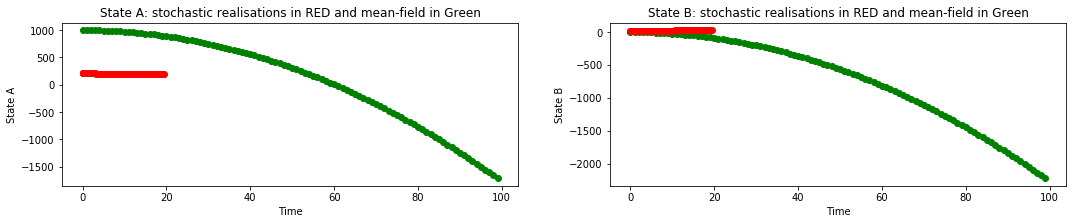

<Figure size 432x288 with 0 Axes>

In [15]:
fig, axx = plt.subplots(1, 2, figsize=(18,3))
plt.figure()

for b in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    r0 = 0.1
    beta = r0*gama
    axx[0].plot(avgT[b],avgA[b],'ro')
    At = n - ((beta*b*b)/2)- ((beta*b*b*b)/(n*3)) - ((gama*b*b)/2)
    axx[0].plot(b,At, 'go')
    axx[0].set_title("State A: stochastic realisations in RED and mean-field in Green")
    axx[0].set(xlabel= 'Time', ylabel='State A')
#print(time,ground)
#plt.plot(time,ground,'ro')

#plt.subplot(2,2,2,)
for b in range(0,100):
    #print(groundTruth[i][0],groundTruth[i][1])
    r0 = 0.1
    beta = r0*gama
    axx[1].plot(avgT[b],avgB[b], 'ro')
    Bt = ((beta*b*b)/2)- ((beta*b*b*b)/(n*3)) - ((gama*b*b)/2)
    #Bt = ((y*y)/(2*Bo))- ((beta*y)/(Bo*n))+((beta*y)/n)- ((beta+gama)/2)
    axx[1].plot(b,Bt, 'go')
    axx[1].set_title("State B: stochastic realisations in RED and mean-field in Green")
    axx[1].set(xlabel= 'Time', ylabel='State B')
#plt.subplot(2,2,3)



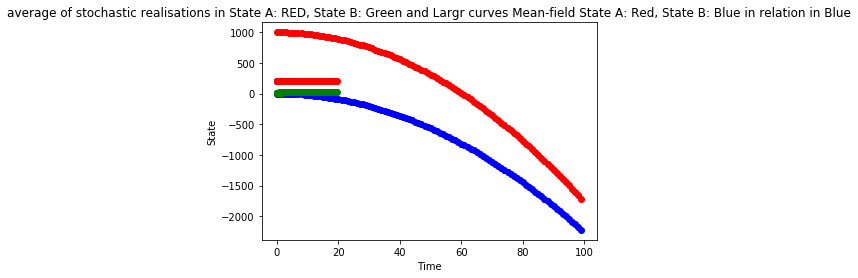

In [16]:
for i in range(0, 100):
    plt.plot(avgT[i], avgA[i],'ro')
    plt.plot(avgT[i],avgB[i], 'go')
    r0 = 0.1
    beta = r0*gama
    Bt = ((beta*i*i)/2)- ((beta*i*i*i)/(n*3)) - ((gama*i*i)/2)
    #Bt = ((y*y)/(2*Bo))- ((beta*y)/(Bo*n))+((beta*y)/n)- ((beta+gama)/2)
    At = n- ((beta*i*i)/2)- ((beta*i*i*i)/(n*3)) - ((gama*i*i)/2)
    plt.plot(i,Bt, 'bo')
    plt.plot(i,At, 'ro')

plt.ylabel("State")
plt.xlabel("Time")
plt.title("average of stochastic realisations in State A: RED, State B: Green and Largr curves Mean-field State A: Red, State B: Blue in relation in Blue")

plt.show()

In [17]:
n= 1000
Bo= 1
gama = 0.5


Text(0.5, 1.0, 'beta = 0.95, gama =0.5,n=1000 average of stochastic realisations in State A: RED, State B: Green and mean-field in relation in Blue')

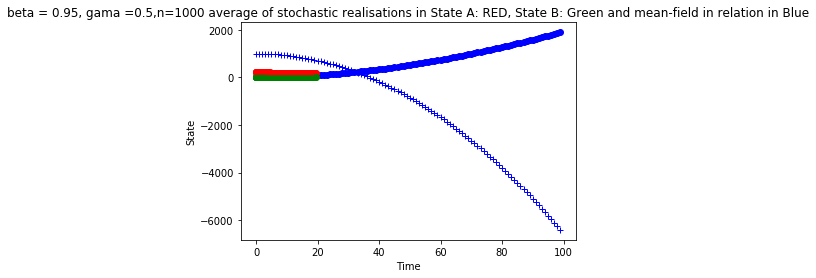

In [18]:
plt.figure()
for i in range(0, 100):
    plt.plot(avgT[i], avgA[i],'ro')# Red line A shows by stocastic process
    plt.plot(avgT[i],avgB[i], 'go')# Red line A shows by stocastic process
    r0 = 0.1
    beta = 0.95
    Bt = ((beta*i*i)/2)- ((beta*i*i*i)/(n*3)) - ((gama*i*i)/2)
    At = n-((beta*i*i)/2)- ((beta*i*i*i)/(n*3)) - ((gama*i*i)/2)
    plt.plot(i,Bt, 'bo')# blue line B shows by meanfield
    plt.plot(i,At, 'b+')# bluePlus line shows A by meanfield

gama = 0.5
plt.ylabel("State")
plt.xlabel("Time")
plt.title("beta = 0.95, gama =0.5,n=1000 average of stochastic realisations in State A: RED, State B: Green and mean-field in relation in Blue")


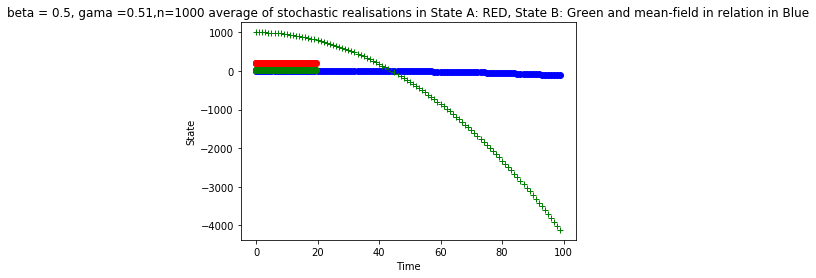

In [19]:
plt.figure()
for i in range(0, 100):
    plt.plot(avgT[i], avgA[i],'ro')# Red line A shows by stocastic process
    plt.plot(avgT[i],avgB[i], 'go')# Red line A shows by stocastic process
    #r0 = 0.1
    beta = 0.51
    Bt = ((beta*i*i)/2)- ((beta*i*i*i)/(n*3)) - ((gama*i*i)/2)
    At = n-((beta*i*i)/2)- ((beta*i*i*i)/(n*3)) - ((gama*i*i)/2)
    plt.plot(i,Bt, 'bo')# blue line B shows by meanfield
    plt.plot(i,At, 'g+')# GreenPlus line shows A by meanfield
plt.ylabel("State")
plt.xlabel("Time")
plt.title("beta = 0.5, gama =0.51,n=1000 average of stochastic realisations in State A: RED, State B: Green and mean-field in relation in Blue")

plt.show()
